<a href="https://colab.research.google.com/github/RutujaJadhav/A-eye/blob/master/Background_subtraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hough circle transform

[258 250  42]


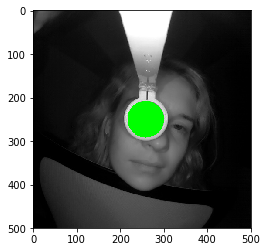

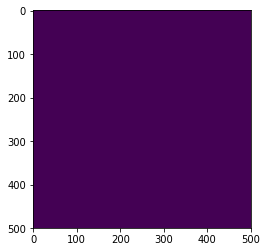

In [0]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('fundus2.jpg',0)
img2 = cv.imread('fundus1.jpg',0)
mask = np.zeros(shape = img.shape, dtype = "uint8")
img = cv.medianBlur(img,5)
cimg = cv.cvtColor(img2,cv.COLOR_GRAY2BGR)


circles = cv.HoughCircles(img,cv.HOUGH_GRADIENT,1,20,
                            param1=50,param2=30,minRadius=30,maxRadius=50)


circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv.circle(cimg,(i[0],i[1]),i[2],(0,255,0),-1)
    #cv.circle(mask,(i[0],i[1]),i[2],(0,255,0),-1)
    # draw the center of the circle
    #cv.circle(cimg,(i[0],i[1]),2,(0,0,255),3)
    print (i)
    
cgray = cv2.cvtColor(cimg,cv2.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(img,250,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
cv.circle(mask,(447,63), 63, (0,0,255), -1)
plt.imshow(cimg)
plt.show()
plt.imshow(mask)
plt.show()

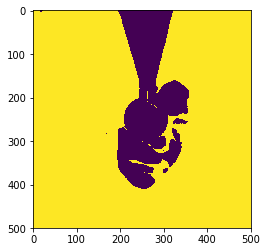

In [0]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('fundus1.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,250,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

plt.imshow(thresh)
plt.show()

#Creating image mask for segmentation

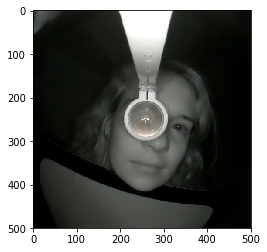

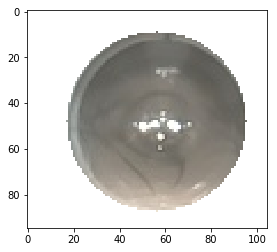

In [0]:
import cv2
import numpy as np

# load the image
img = cv2.imread('fundus2.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# detect circles
#gray = cv2.medianBlur(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY), 5)
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=30, minRadius=30, maxRadius=50)

circles = np.uint16(np.around(circles))

# draw mask
mask = np.full((img.shape[0], img.shape[1]), 0, dtype=np.uint8)  # mask is only 
for i in circles[0, :]:
    cv2.circle(mask, (i[0], i[1]), i[2], (255, 255, 255), -1)

# get first masked value (foreground)
fg = cv2.bitwise_or(img, img, mask=mask)

# get second masked value (background) mask must be inverted
mask = cv2.bitwise_not(mask)
background = np.full(img.shape, 255, dtype=np.uint8)
bk = cv2.bitwise_or(background, background, mask=mask)

# combine foreground+background
final = cv2.bitwise_or(fg, bk)
final = final[200:295, 200:305]
plt.imshow(img)
plt.show()
plt.imshow(final)
plt.show()


In [0]:
#dataset
#gamma thresholding results on the sample
#background subtraction results
TODOs
#background subtraction results on rpi all captured images
#combined script to capture image and do the thresholding
#test results
#directions to capture the image 